# Challenge 1

## SciPy Tutorial
Pertinent information about [SciPy](https://docs.scipy.org/) and NumPy is available in the [SciPy Tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html).
 * Read [Introduction](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html)
 * Read [Basic functions](https://docs.scipy.org/doc/scipy/reference/tutorial/basic.html)
 * Read [Optimization](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)
 
Consider the function defined below.
 * Plot the function using [matplotlib](https://matplotlib.org/)

In [160]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from pylab import *
from scipy.optimize import minimize_scalar



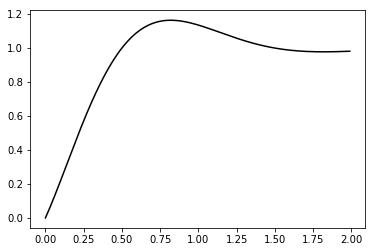

In [161]:
def g(t):
    return 1 - (np.exp(-2*t) * np.cos(np.pi*t))

t1 = np.arange(0.0, 2.0, 0.01)

plt.figure(1)
plt.plot(t1, g(t1), 'k')
plt.show()


Consider the class of functions of the form $f(t) = 1 - e^{-at}$ where $a$ is a free parameter.
 * Find the value of $a$ that minimizes the $L_2$ norm between $g(t)$ and $f(t)$ over the interval $[0, 2]$
 * Computer the residual mean squared error
 * Explain how you obtained $a$

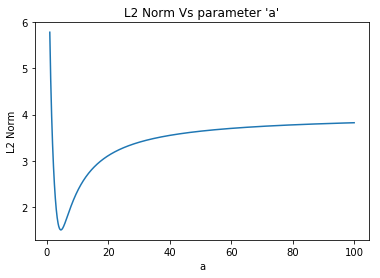

a for minimizing L2 norm between g(t) and f(t) is 4.6
Mean square error for the least L2 norm is  2.26364141313
4.60346764628
1.50453869921


In [166]:
def f(t,a) : 
    return 1 - np.exp(-a*t)

t1 = np.arange(0.0,2.0,0.01)
a1 = np.arange(1,100,0.1) # choices of the range for a1 is constrained to [1,100] after understanding the nature of the function.
                          # The above function starts from f(t)= 0 and settles to a step function of f(t) =1 with increase in value of "a". 
                          # to achive the objective its intutive to limit the range anything below 100. 

rms = np.zeros(len(a1))
k=0  # incrementer for populating L2 Norm for each value of 'a'


for i in a1:
#     plt.plot(t1,f(t1,i))    
    rms[k] = np.sqrt(np.sum(np.square(g(t1) - f(t1,i))))   # computing L2 norm for individual values of A ranging over 1:100
    k=k+1



import operator

plt.plot(a1,rms) 
plt.xlabel("a")
plt.ylabel("L2 Norm")
plt.title("L2 Norm Vs parameter 'a'")
plt.show()
# On observing the dependence of a on L2 Norm , Its understood that it has global minimum

#  finding a for Lowest L2 norm value 
ind,min_val = min(enumerate(rms), key=operator.itemgetter(1))  # For finding the index postion and value for minimum L2 norm  

a = a1[ind] # finding a for corrosponding lowest L2 norm

RMSE = min_val*min_val  # residual mean square error for lowest L2 norm = (L2_norm)^2

# verifying using inbuilt optimize tools like 

print("a for minimizing L2 norm between g(t) and f(t) is",a)
print("Mean square error for the least L2 norm is ", RMSE)


#  cross verfying using inbuilt optimizer functions in scipy.  
def obj(x):
    add = 0
    for i in t1:
#     plt.plot(t1,f(t1,i))    
        add = add + np.sum(np.square(g(i) - f(x,i)))   # computing L2 norm for individual values of A ranging over 1:100
    return np.sqrt(add)

ans = minimize_scalar(obj) # finds the minimum for a defined function obj over the range specified.  
print(ans.x)
print(obj(ans.x))







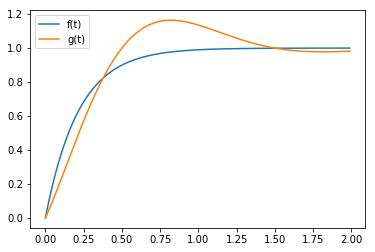

In [165]:
# graphical representation of closeness between g(t) and f(t)
fig,ax = subplots()
ax.plot(t1,f(t1,a1[ind]),label = "f(t)")
ax.plot(t1,g(t1), label ="g(t)")
ax.legend(["f(t)","g(t)"])
plt.show()



To obtain the parameter value a for least L2 norm.
1. Understood the behavior of f(t) over a range of values of 'a'
2. Defined the objective function, in this case is to find least L2 norm between f(t) and g(t) defined over a variable 'a'.
3. Constrained the boundries of 'a' to limit the iterations
4. found the global minimum for the objective function over the range of 'a'. 
5. Since F(t,a) is one to one mapped to 'a'. 'a' is found using inbuilt function min, which specifies both index and minimum value. 
6. Approach 2 : Used Minimize scalar on the objective function which needs to be minimized for user defined function,which here is the L2 norm parameterized on a.
7. The result object has value for which objective function is minimized. Hence it returns 'a' 

